In [1]:
import sys
from pathlib import Path
import os

# Add project root to path (works in Jupyter notebooks)
# Since notebook is in examples/, go up one level to get project root
project_root = Path().resolve()
if project_root.name == 'examples':
    project_root = project_root.parent
sys.path.insert(0, str(project_root))

from powerflow.io.json import load_json_network
from powerflow.solver.newton_raphson import LoadFlow

In [2]:
# Get project root (same logic as Cell 0, in case cells are run independently)
project_root = Path().resolve()
if project_root.name == 'examples':
    project_root = project_root.parent

net = load_json_network(str(project_root / "networks" / "IEEE14.json"))
res = LoadFlow(verbose=True, tol=1e-9).solve(net)
Vm, Va = res["Vm"], res["Va"]
print("\n=== RESULTS IEEE14 ===")
for i,(v,a) in enumerate(zip(Vm, Va)):
    print(f"Bus {i:2d}: |V|={v:.5f} pu, angle={a*180/3.141592653589793:.3f} deg")


iter 00 | max mismatch = 4.009e-01
iter 01 | max mismatch = 2.107e-02
iter 02 | max mismatch = 4.370e-05
iter 03 | max mismatch = 2.345e-10
Converged in 3 iterations

=== RESULTS IEEE14 ===
Bus  0: |V|=1.06000 pu, angle=0.000 deg
Bus  1: |V|=1.04500 pu, angle=-4.423 deg
Bus  2: |V|=0.98808 pu, angle=-10.661 deg
Bus  3: |V|=1.02197 pu, angle=-7.467 deg
Bus  4: |V|=1.02608 pu, angle=-6.172 deg
Bus  5: |V|=1.07000 pu, angle=-7.508 deg
Bus  6: |V|=1.05787 pu, angle=-7.576 deg
Bus  7: |V|=1.09000 pu, angle=-4.949 deg
Bus  8: |V|=1.05667 pu, angle=-8.039 deg
Bus  9: |V|=1.05608 pu, angle=-8.118 deg
Bus 10: |V|=1.06272 pu, angle=-7.811 deg
Bus 11: |V|=1.04720 pu, angle=-8.170 deg
Bus 12: |V|=1.05816 pu, angle=-8.032 deg
Bus 13: |V|=1.03938 pu, angle=-9.028 deg


In [3]:
Vm, Va, P, Q = res["Vm"], res["Va"], res["P"], res["Q"]

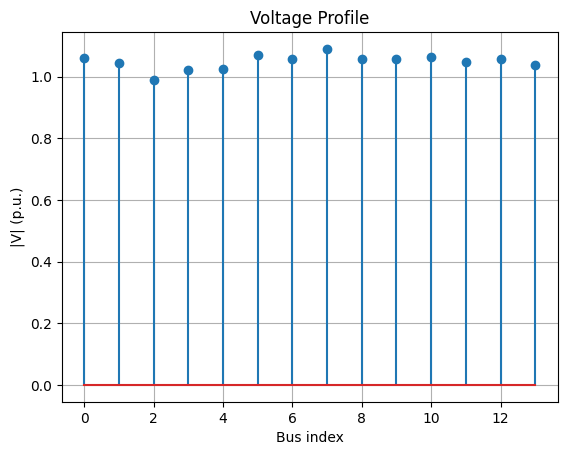

In [4]:
from powerflow.visualization.plots import PowerFlowReport

report = PowerFlowReport(net, Vm, Va, P, Q)
report.plot_voltage_profile()

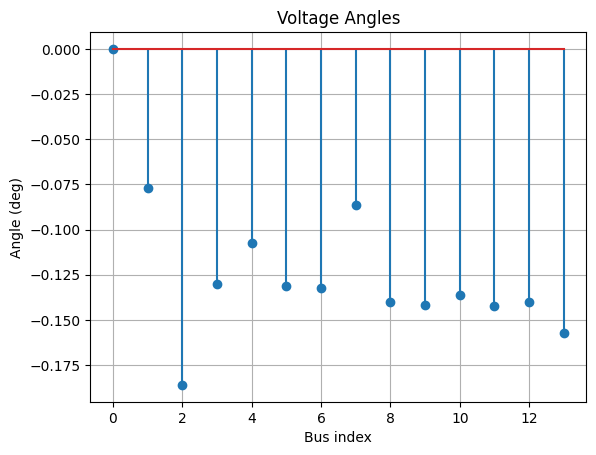

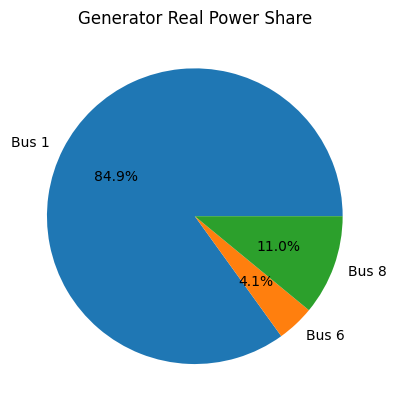

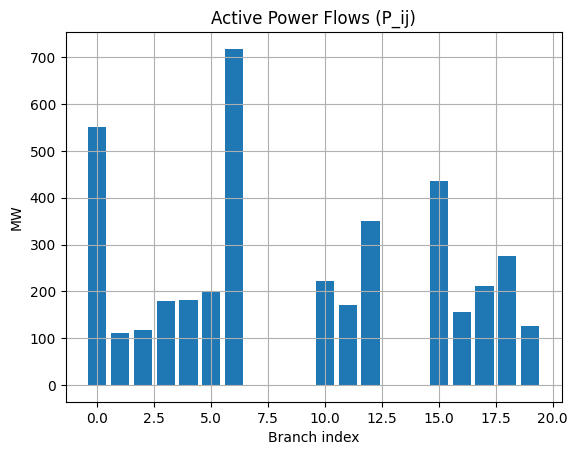

In [5]:
report.plot_angle_profile()
report.plot_generation_pie()
report.plot_branch_flows()
report.show_all()

In [6]:
report.print_branch_flows_table()


BRANCH POWER FLOWS
Branch   From   From type  To     To type    Vi (p.u.)    Vj (p.u.)    P_ij (MW)    Q_ij (MVAr)  P_ji (MW)    Q_ji (MVAr)  Losses (MW) 
--------------------------------------------------------------------------------------------------------------------------------------------
1        1      Slack      2      PV              1.0600      1.0450     10.2270     20.5575    -10.1135    -26.0602      0.1135
2        1      Slack      5      PQ              1.0600      1.0261      4.5546     12.2527     -4.4362    -17.1179      0.1184
3        2      PV         3      PQ              1.0450      0.9881      7.6896     25.8295     -7.3215    -28.8081      0.3681
4        2      PV         4      PQ              1.0450      1.0220      4.5648     10.2904     -4.4752    -13.6504      0.0896
5        2      PV         5      PQ              1.0450      1.0261      3.6597      8.2813     -3.5988    -11.8059      0.0609
6        3      PQ         4      PQ              0.9881  